In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv("INDEX2023.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

The LLR Test

In [8]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Creating Returns

In [9]:
df['returns'] = df.market_value.pct_change(1)*100

ARIMA(1,1,1)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6168
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -33854.965
Date:                Sat, 02 Sep 2023   AIC                          67715.929
Time:                        17:41:59   BIC                          67736.110
Sample:                    01-10-1994   HQIC                         67722.928
                         - 08-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8256      0.042     19.435      0.000       0.742       0.909
ma.L1         -0.8611      0.038    -22.727      0.000      -0.935      -0.787
sigma2      3434.0705     37.046     92.698      0.000    3361.462    3506.679
===================================================================================
Ljung-Box (L1) (Q):                   2.86   Jarque-Bera (JB):              3585.51
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.32
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residuals of the ARIMA(1,1,1)

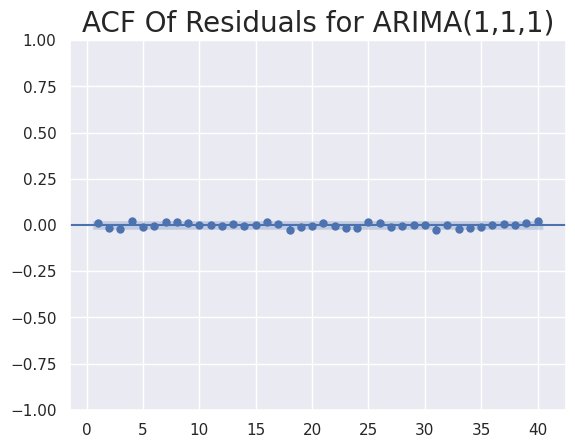

In [11]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

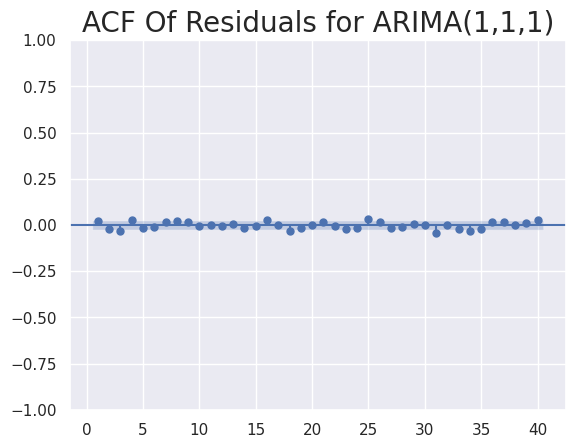

In [12]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

Higher-Lag ARIMA Models

In [13]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [14]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -33854.96450343367 	 AIC =  67715.92900686734
ARIMA(1,1,2):  	 LL =  -33851.009530966956 	 AIC =  67710.01906193391
ARIMA(1,1,3):  	 LL =  -33848.3685832282 	 AIC =  67706.7371664564
ARIMA(2,1,1):  	 LL =  -33850.85521114078 	 AIC =  67709.71042228155
ARIMA(3,1,1):  	 LL =  -33849.86438337822 	 AIC =  67709.72876675644
ARIMA(3,1,2):  	 LL =  -33848.216322386346 	 AIC =  67708.43264477269


In [15]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.022


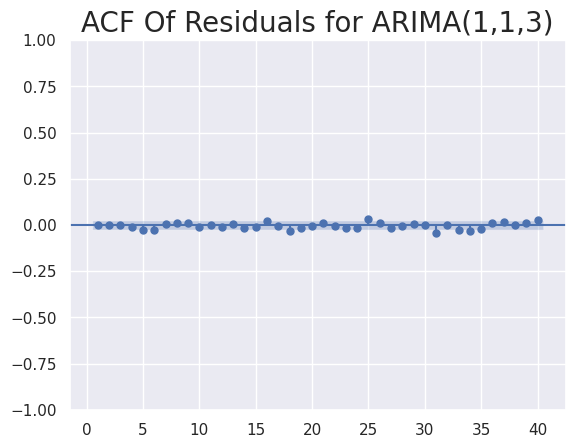

In [16]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [17]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [18]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6168
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -33844.133
Date:                Sat, 02 Sep 2023   AIC                          67702.266
Time:                        17:43:08   BIC                          67749.355
Sample:                    01-10-1994   HQIC                         67718.596
                         - 08-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3680      0.160      2.298      0.022       0.054       0.682
ar.L2         -0.0454      0.009     -4.787      0.000      -0.064      -0.027
ar.L3         -0.0383      0.012     -3.202      0.001      -0.062      -0.015
ar.L4          0.0283      0.013      2.223      0.026       0.003       0.053
ar.L5         -0.0452      0.008     -5.350      0.000      -0.062      -0.029
ma.L1         -0.3806      0.160     -2.373      0.018      -0.695      -0.066
sigma2      3425.3599     37.735     90.774      0.000    3351.401    3499.319
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3349.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.30
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -33848.3685832282 	 AIC =  67706.7371664564
ARIMA(5,1,1):  	 LL =  -33844.133220943535 	 AIC =  67702.26644188707
ARIMA(6,1,3):  	 LL =  -33842.72403561047 	 AIC =  67705.44807122093


In [20]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.046


In [21]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.42


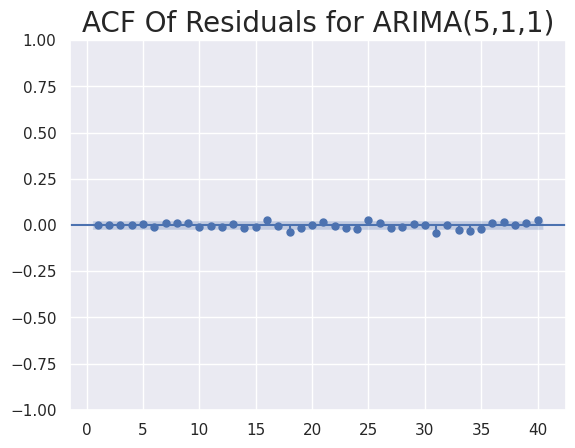

In [22]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

Models with Higher Levels of Integration

In [23]:
df['delta_prices']=df.market_value.diff(1)

In [24]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6167
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -33854.387
Date:                Sat, 02 Sep 2023   AIC                          67716.773
Time:                        17:43:34   BIC                          67743.681
Sample:                    01-11-1994   HQIC                         67726.105
                         - 08-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6377      0.660      0.966      0.334      -0.656       1.931
ar.L1          0.8305      0.041     20.168      0.000       0.750       0.911
ma.L1         -0.8660      0.037    -23.503      0.000      -0.938      -0.794
sigma2      3433.4906     37.270     92.126      0.000    3360.444    3506.538
===================================================================================
Ljung-Box (L1) (Q):                   2.83   Jarque-Bera (JB):              3591.39
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.32
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
sts.adfuller(df.delta_prices[1:])

(-35.348602427349505,
 0.0,
 5,
 6161,
 {'1%': -3.4314118449359454,
  '5%': -2.862009240104034,
  '10%': -2.56701977372707},
 67341.1848929688)

In [26]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6168
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -33865.852
Date:                Sat, 02 Sep 2023   AIC                          67737.704
Time:                        17:43:45   BIC                          67757.884
Sample:                    01-10-1994   HQIC                         67744.702
                         - 08-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0096      0.009     -1.075      0.282      -0.027       0.008
ma.L1         -0.9999      0.006   -166.727      0.000      -1.012      -0.988
sigma2      3447.2796     41.352     83.363      0.000    3366.230    3528.329
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3536.53
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.21
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

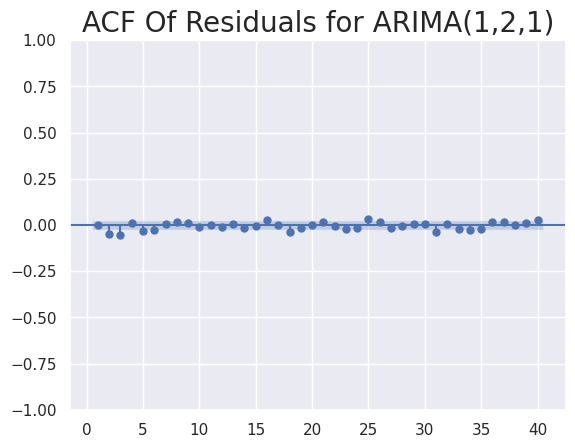

In [27]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

ARIMAX

In [28]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6168
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32715.432
Date:                Sat, 02 Sep 2023   AIC                          65438.863
Time:                        17:43:58   BIC                          65465.771
Sample:                    01-10-1994   HQIC                         65448.195
                         - 08-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5959      0.031     83.309      0.000       2.535       2.657
ar.L1          0.2147      0.029      7.279      0.000       0.157       0.272
ma.L1         -0.4857      0.026    -18.370      0.000      -0.538      -0.434
sigma2      2372.9655     24.724     95.979      0.000    2324.508    2421.423
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              4599.08
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6168
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -32730.510
Date:                           Sat, 02 Sep 2023   AIC                          65475.020
Time:                                   17:44:24   BIC                          65522.110
Sample:                               01-10-1994   HQIC                         65491.350
                                    - 08-30-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6064      0.031     83.633      0.000       2.545       2.667
ar.L1          0.9998      0.000   2780.952      0.000       0.999       1.000
ma.L1         -0.2864      0.009    -32.704      0.000      -0.304      -0.269
ar.S.L5        0.9694      0.016     59.694      0.000       0.938       1.001
ar.S.L10       0.0298      0.010      3.133      0.002       0.011       0.048
ma.S.L5       -0.9990      0.013    -76.206      0.000      -1.025      -0.973
sigma2      2377.6967     25.917     91.742      0.000    2326.900    2428.493
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):              4428.44
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""